In [ ]:
!pip install geopandas
!pip install geoplot
!pip install dash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.9 MB/s 
     |████████████████████████████████| 6.3 MB 50.2 MB/s 
     |████████████████████████████████| 16.7 MB 44.8 MB/s 


In [ ]:
!pip uninstall shapely
!pip install shapely --no-binary shapely

Found existing installation: Shapely 1.8.5.post1
Uninstalling Shapely-1.8.5.post1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/Shapely-1.8.5.post1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/Shapely.libs/libgeos-35e678a0.so.3.10.3
    /usr/local/lib/python3.7/dist-packages/Shapely.libs/libgeos_c-c8ec7514.so.1.16.1
    /usr/local/lib/python3.7/dist-packages/shapely/*
Proceed (y/n)? y
  Successfully uninstalled Shapely-1.8.5.post1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 200 kB 4.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for shapely: filename=Shapely-1.8.5.post1-cp37-cp37m-linux_x86_64.whl size=669768 sha256=6386e684d972c8ddcc0328389fd820f50bbac3367102511ad59485066dec0c40
  Stored in directory: /root/.cache/pip/wheels

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import geoplot as gplt
import re
import geoplot.crs as gcrs
from shapely.geometry import Point
%matplotlib inline

In [ ]:
df = pd.read_csv('500_Cities_CDC.csv')
df = df[['StateAbbr','PlaceName','PlaceFIPS','Population2010','ACCESS2_AdjPrev','ARTHRITIS_AdjPrev','BINGE_AdjPrev','BPHIGH_AdjPrev','BPMED_AdjPrev','CANCER_AdjPrev','CASTHMA_AdjPrev','CHD_AdjPrev','CHECKUP_AdjPrev','CHOLSCREEN_AdjPrev','COLON_SCREEN_AdjPrev','COPD_AdjPrev','COREM_AdjPrev','COREW_AdjPrev','CSMOKING_AdjPrev','DENTAL_AdjPrev','DIABETES_AdjPrev','HIGHCHOL_AdjPrev','KIDNEY_AdjPrev','LPA_AdjPrev','MAMMOUSE_AdjPrev','MHLTH_AdjPrev','OBESITY_AdjPrev','PAPTEST_AdjPrev','PHLTH_AdjPrev','SLEEP_AdjPrev','STROKE_AdjPrev','TEETHLOST_AdjPrev','Geolocation']]
df.head()

,StateAbbr,PlaceName,PlaceFIPS,Population2010,ACCESS2_AdjPrev,ARTHRITIS_AdjPrev,BINGE_AdjPrev,BPHIGH_AdjPrev,BPMED_AdjPrev,CANCER_AdjPrev,...,LPA_AdjPrev,MAMMOUSE_AdjPrev,MHLTH_AdjPrev,OBESITY_AdjPrev,PAPTEST_AdjPrev,PHLTH_AdjPrev,SLEEP_AdjPrev,STROKE_AdjPrev,TEETHLOST_AdjPrev,Geolocation
0,AL,Birmingham,107000,212237,21.4,32.6,11.4,45.9,70.5,6.1,...,31.7,79.7,17.0,39.0,80.1,18.3,46.9,5.0,25.9,"(33.52756637730, -86.7988174678)"
1,AL,Hoover,135896,81619,10.2,25.3,15.7,31.9,63.8,6.8,...,17.8,82.1,10.8,24.7,86.3,10.0,34.6,2.2,9.5,"(33.37676027290, -86.8051937568)"
2,AL,Huntsville,137000,180105,16.3,29.4,12.3,36.7,66.9,6.5,...,24.9,80.0,14.0,32.0,83.5,13.9,39.7,3.2,14.7,"(34.69896926710, -86.6387042882)"
3,AL,Mobile,150000,195111,19.1,31.8,12.8,43.0,69.3,6.5,...,27.4,80.1,15.8,37.6,81.9,16.3,42.2,4.1,24.1,"(30.67762486480, -88.1184482714)"
4,AL,Montgomery,151000,205764,18.5,31.4,12.2,40.6,70.3,6.4,...,27.9,80.2,15.5,36.8,83.0,16.2,41.3,4.1,21.2,"(32.34726453330, -86.2677059552)"


In [ ]:
latitude = []
longitude = []
for line in df['Geolocation']:
  m = re.findall(r'-*\d+\.\d+', line)
  latitude.append(float(m[0]))
  longitude.append(float(m[1]))
df["geometry"] = list(zip(longitude, latitude))
df["geometry"] = df["geometry"].apply(Point)
df.head()

,StateAbbr,PlaceName,PlaceFIPS,Population2010,ACCESS2_AdjPrev,ARTHRITIS_AdjPrev,BINGE_AdjPrev,BPHIGH_AdjPrev,BPMED_AdjPrev,CANCER_AdjPrev,...,MAMMOUSE_AdjPrev,MHLTH_AdjPrev,OBESITY_AdjPrev,PAPTEST_AdjPrev,PHLTH_AdjPrev,SLEEP_AdjPrev,STROKE_AdjPrev,TEETHLOST_AdjPrev,Geolocation,geometry
0,AL,Birmingham,107000,212237,21.4,32.6,11.4,45.9,70.5,6.1,...,79.7,17.0,39.0,80.1,18.3,46.9,5.0,25.9,"(33.52756637730, -86.7988174678)",POINT (-86.79881746780001 33.5275663773)
1,AL,Hoover,135896,81619,10.2,25.3,15.7,31.9,63.8,6.8,...,82.1,10.8,24.7,86.3,10.0,34.6,2.2,9.5,"(33.37676027290, -86.8051937568)",POINT (-86.80519375679999 33.3767602729)
2,AL,Huntsville,137000,180105,16.3,29.4,12.3,36.7,66.9,6.5,...,80.0,14.0,32.0,83.5,13.9,39.7,3.2,14.7,"(34.69896926710, -86.6387042882)",POINT (-86.6387042882 34.6989692671)
3,AL,Mobile,150000,195111,19.1,31.8,12.8,43.0,69.3,6.5,...,80.1,15.8,37.6,81.9,16.3,42.2,4.1,24.1,"(30.67762486480, -88.1184482714)",POINT (-88.1184482714 30.6776248648)
4,AL,Montgomery,151000,205764,18.5,31.4,12.2,40.6,70.3,6.4,...,80.2,15.5,36.8,83.0,16.2,41.3,4.1,21.2,"(32.34726453330, -86.2677059552)",POINT (-86.2677059552 32.3472645333)


In [ ]:
df.head()

,StateAbbr,PlaceName,PlaceFIPS,Population2010,ACCESS2_AdjPrev,ARTHRITIS_AdjPrev,BINGE_AdjPrev,BPHIGH_AdjPrev,BPMED_AdjPrev,CANCER_AdjPrev,...,MAMMOUSE_AdjPrev,MHLTH_AdjPrev,OBESITY_AdjPrev,PAPTEST_AdjPrev,PHLTH_AdjPrev,SLEEP_AdjPrev,STROKE_AdjPrev,TEETHLOST_AdjPrev,Geolocation,geometry
0,AL,Birmingham,107000,212237,21.4,32.6,11.4,45.9,70.5,6.1,...,79.7,17.0,39.0,80.1,18.3,46.9,5.0,25.9,"(33.52756637730, -86.7988174678)",POINT (-86.79881746780001 33.5275663773)
1,AL,Hoover,135896,81619,10.2,25.3,15.7,31.9,63.8,6.8,...,82.1,10.8,24.7,86.3,10.0,34.6,2.2,9.5,"(33.37676027290, -86.8051937568)",POINT (-86.80519375679999 33.3767602729)
2,AL,Huntsville,137000,180105,16.3,29.4,12.3,36.7,66.9,6.5,...,80.0,14.0,32.0,83.5,13.9,39.7,3.2,14.7,"(34.69896926710, -86.6387042882)",POINT (-86.6387042882 34.6989692671)
3,AL,Mobile,150000,195111,19.1,31.8,12.8,43.0,69.3,6.5,...,80.1,15.8,37.6,81.9,16.3,42.2,4.1,24.1,"(30.67762486480, -88.1184482714)",POINT (-88.1184482714 30.6776248648)
4,AL,Montgomery,151000,205764,18.5,31.4,12.2,40.6,70.3,6.4,...,80.2,15.5,36.8,83.0,16.2,41.3,4.1,21.2,"(32.34726453330, -86.2677059552)",POINT (-86.2677059552 32.3472645333)


In [ ]:
df_state = df[['StateAbbr','ACCESS2_AdjPrev','ARTHRITIS_AdjPrev','BINGE_AdjPrev','BPHIGH_AdjPrev','BPMED_AdjPrev','CANCER_AdjPrev','CASTHMA_AdjPrev','CHD_AdjPrev','CHECKUP_AdjPrev','CHOLSCREEN_AdjPrev','COLON_SCREEN_AdjPrev','COPD_AdjPrev','COREM_AdjPrev','COREW_AdjPrev','CSMOKING_AdjPrev','DENTAL_AdjPrev','DIABETES_AdjPrev','HIGHCHOL_AdjPrev','KIDNEY_AdjPrev','LPA_AdjPrev','MAMMOUSE_AdjPrev','MHLTH_AdjPrev','OBESITY_AdjPrev','PAPTEST_AdjPrev','PHLTH_AdjPrev','SLEEP_AdjPrev','STROKE_AdjPrev','TEETHLOST_AdjPrev']]
df_state = df_state.groupby(['StateAbbr']).sum().reset_index()
df_state

,StateAbbr,ACCESS2_AdjPrev,ARTHRITIS_AdjPrev,BINGE_AdjPrev,BPHIGH_AdjPrev,BPMED_AdjPrev,CANCER_AdjPrev,CASTHMA_AdjPrev,CHD_AdjPrev,CHECKUP_AdjPrev,...,KIDNEY_AdjPrev,LPA_AdjPrev,MAMMOUSE_AdjPrev,MHLTH_AdjPrev,OBESITY_AdjPrev,PAPTEST_AdjPrev,PHLTH_AdjPrev,SLEEP_AdjPrev,STROKE_AdjPrev,TEETHLOST_AdjPrev
0,AK,14.5,21.3,20.2,30.2,49.0,6.2,8.6,5.0,60.7,...,2.3,19.2,70.4,9.4,27.7,79.9,9.9,33.4,2.6,13.0
1,AL,104.0,182.8,76.5,238.1,409.8,38.8,61.6,41.9,443.9,...,17.2,158.3,481.9,89.0,208.6,495.8,91.3,246.1,22.7,116.0
2,AR,95.0,129.5,70.5,176.8,318.2,31.2,46.9,36.9,324.8,...,14.9,149.3,358.4,69.5,164.6,387.9,74.6,180.0,16.5,96.0
3,AZ,198.0,270.0,187.2,331.9,666.7,71.9,116.2,67.3,777.6,...,40.3,245.0,937.2,140.7,332.5,971.9,140.3,410.0,32.8,146.3
4,CA,2149.9,2399.7,1951.1,3377.8,6281.0,674.8,1021.3,669.0,7901.0,...,305.0,2794.4,9626.9,1445.7,2987.7,9803.5,1527.5,4230.2,327.6,1329.9
5,CO,209.4,308.6,250.1,356.3,728.4,82.0,121.4,66.7,848.1,...,32.2,232.1,1025.6,138.4,309.0,1154.9,142.1,401.5,34.1,165.3
6,CT,143.7,187.3,120.0,262.0,478.6,47.8,82.1,48.3,542.7,...,22.1,210.7,640.2,104.6,247.2,661.2,99.9,308.6,25.8,123.0
7,DC,9.9,21.4,20.3,31.2,59.3,5.7,10.2,4.8,72.0,...,2.6,20.5,79.9,10.9,25.4,86.0,9.8,35.2,3.5,11.7
8,DE,18.3,26.2,14.7,39.4,68.5,5.7,11.0,6.5,74.4,...,3.6,31.4,82.5,14.4,39.3,84.4,14.8,44.2,4.2,19.9
9,FL,747.0,780.0,574.8,1035.3,2035.1,200.1,292.6,208.4,2380.9,...,105.0,797.0,2601.9,441.5,919.3,2645.6,421.5,1246.3,102.5,451.1


In [ ]:
import plotly.express as px
fig = px.choropleth(df_state,
locations='StateAbbr',
color='ACCESS2_AdjPrev',
color_continuous_scale='spectral_r',
locationmode='USA-states',
labels={'ACCESS2_AdjPrev':'ACCESS2_AdjPrev'},
scope='usa')

# Add state labels
fig.add_scattergeo(
    locations=df['StateAbbr'],
    locationmode='USA-states',
    text=df['StateAbbr'],
    mode='text')

# Add map title
fig.update_layout(
    title={'text':'Health Condition by State',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})


fig.show()

In [ ]:
gdf = gpd.GeoDataFrame(df, geometry="geometry")
gdf.head()

,StateAbbr,PlaceName,PlaceFIPS,Population2010,ACCESS2_AdjPrev,ARTHRITIS_AdjPrev,BINGE_AdjPrev,BPHIGH_AdjPrev,BPMED_AdjPrev,CANCER_AdjPrev,...,MAMMOUSE_AdjPrev,MHLTH_AdjPrev,OBESITY_AdjPrev,PAPTEST_AdjPrev,PHLTH_AdjPrev,SLEEP_AdjPrev,STROKE_AdjPrev,TEETHLOST_AdjPrev,Geolocation,geometry
0,AL,Birmingham,107000,212237,21.4,32.6,11.4,45.9,70.5,6.1,...,79.7,17.0,39.0,80.1,18.3,46.9,5.0,25.9,"(33.52756637730, -86.7988174678)",POINT (-86.79882 33.52757)
1,AL,Hoover,135896,81619,10.2,25.3,15.7,31.9,63.8,6.8,...,82.1,10.8,24.7,86.3,10.0,34.6,2.2,9.5,"(33.37676027290, -86.8051937568)",POINT (-86.80519 33.37676)
2,AL,Huntsville,137000,180105,16.3,29.4,12.3,36.7,66.9,6.5,...,80.0,14.0,32.0,83.5,13.9,39.7,3.2,14.7,"(34.69896926710, -86.6387042882)",POINT (-86.63870 34.69897)
3,AL,Mobile,150000,195111,19.1,31.8,12.8,43.0,69.3,6.5,...,80.1,15.8,37.6,81.9,16.3,42.2,4.1,24.1,"(30.67762486480, -88.1184482714)",POINT (-88.11845 30.67762)
4,AL,Montgomery,151000,205764,18.5,31.4,12.2,40.6,70.3,6.4,...,80.2,15.5,36.8,83.0,16.2,41.3,4.1,21.2,"(32.34726453330, -86.2677059552)",POINT (-86.26771 32.34726)


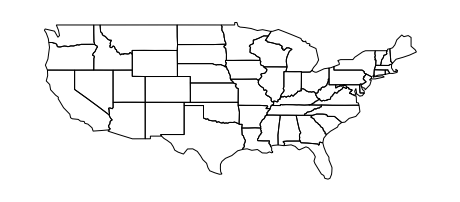

In [ ]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path("contiguous_usa"))
gplt.polyplot(contiguous_usa)

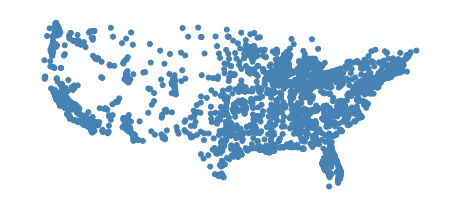

In [ ]:
usa_cities = gpd.read_file(gplt.datasets.get_path("usa_cities"))
continental_usa_cities = usa_cities.query('STATE not in ["HI", "AK", "PR"]')
gplt.pointplot(continental_usa_cities)

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarnin

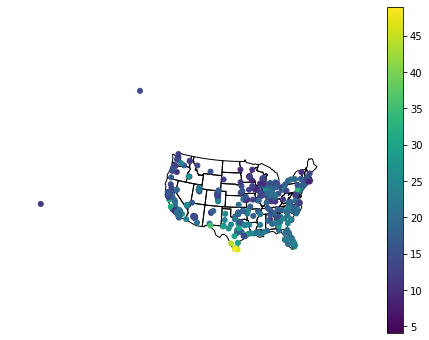

In [ ]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())
gplt.pointplot(
    gdf,
    ax=ax,
    hue="ACCESS2_AdjPrev",
    legend=True
)

/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:228: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  if len(multi_line_string) > 1:
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:239: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  line_strings = list(multi_line_string)
/usr/local/lib/python3.7/dist-packages/cartopy/crs.py:280: ShapelyDeprecationWarnin

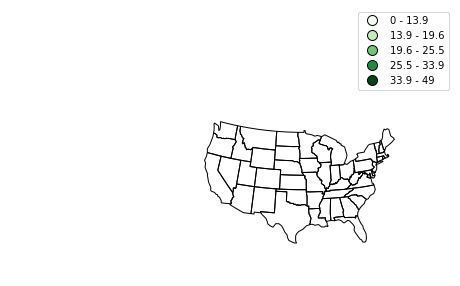

In [ ]:
ax = gplt.polyplot(contiguous_usa, projection=gcrs.AlbersEqualArea())
gplt.choropleth(
    contiguous_usa,
    hue="population",
    edgecolor="white",
    linewidth=1,
    cmap="Greens",
    legend=True,
    scheme="FisherJenks",
    legend_labels=[
        "<3 million", "3-6.7 million", "6.7-12.8 million",
        "12.8-25 million", "25-37 million"
    ],
    projection=gcrs.AlbersEqualArea(),
    ax=ax
)

In [ ]:
contiguous_usa

,state,adm1_code,population,geometry
0,Minnesota,USA-3514,5303925,"POLYGON ((-89.59941 48.01027, -89.48888 48.013..."
1,Montana,USA-3515,989415,"POLYGON ((-111.19419 44.56116, -111.29155 44.7..."
2,North Dakota,USA-3516,672591,"POLYGON ((-96.60136 46.35136, -96.53891 46.199..."
3,Idaho,USA-3518,1567582,"POLYGON ((-111.04973 44.48816, -111.05025 42.0..."
4,Washington,USA-3519,6724540,"POLYGON ((-116.99807 46.33017, -116.90653 46.1..."
5,Arizona,USA-3520,6392017,"POLYGON ((-109.04523 36.99991, -109.04367 31.3..."
6,California,USA-3521,37253956,"POLYGON ((-114.35490 34.46467, -114.16597 34.2..."
7,Colorado,USA-3522,5029196,"POLYGON ((-102.05017 40.00082, -102.04012 38.4..."
8,Nevada,USA-3523,2700551,"POLYGON ((-114.03053 36.99410, -114.02363 36.1..."
9,New Mexico,USA-3524,2059179,"POLYGON ((-103.00161 33.87995, -103.00161 31.9..."
